Data Assessment Example. Please see markdowns and comments in code for context and detail

# Part - 1 Relational Data Model

After looking over the unstructured data and doing some cleaning, below is an image of the entity relationship diagram I would use. Primary keys, joinable columns are marked

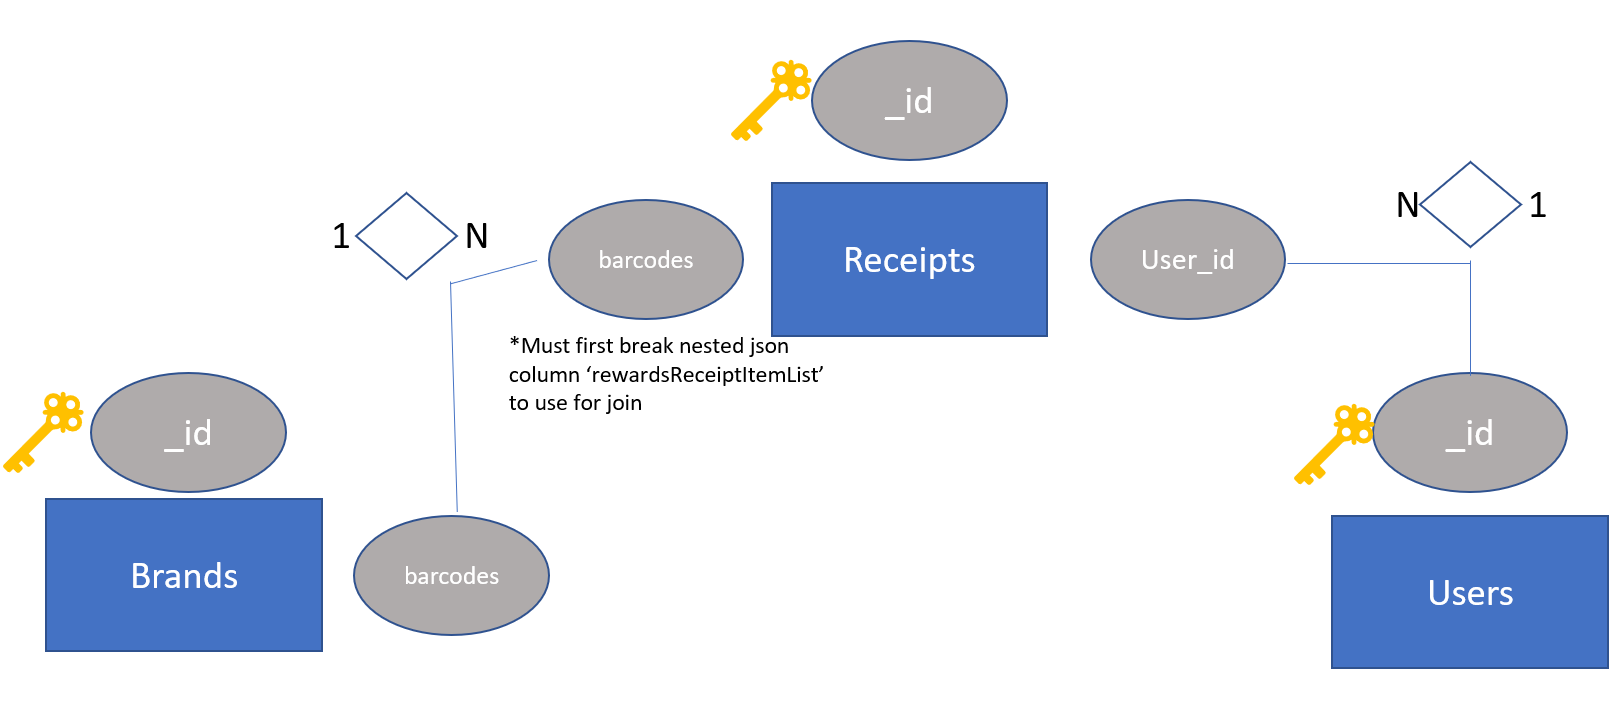

# Part 2 - Data discovery and quality issues

In [1]:
#importing pandas
import pandas as pd

#pulling in json files
receipts = pd.read_json(r'C:\Users\Andrew\Desktop\assessment\receipts.json', lines=True)
users = pd.read_json(r'C:\Users\Andrew\Desktop\assessment\users.json', lines=True)
brands = pd.read_json(r'C:\Users\Andrew\Desktop\assessment\brands.json', lines=True)

In [2]:
#Looking at the initial null count in receipts. This is the first data quality issue, I see a lot of nulls
receipts.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [3]:
#Looking at the receipts sample data. I notice there is a nested column that needs to be broken. 
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [4]:
#breaking down the nested json column
receipts = receipts.explode('rewardsReceiptItemList').reset_index(drop=True)
receipts = receipts.merge(pd.json_normalize(receipts['rewardsReceiptItemList']), left_index=True, right_index=True).drop('rewardsReceiptItemList', axis=1)
#receipts['barcode'] = receipts['barcode'].fillna(receipts['userFlaggedBarcode'])

In [5]:
#Looking at the new null counts after unnesting. There are even more nulls now.
receipts.isnull().sum()

_id                                      0
bonusPointsEarned                     1401
bonusPointsEarnedReason               1401
createDate                               0
dateScanned                              0
finishedDate                          1411
modifyDate                               0
pointsAwardedDate                     1301
pointsEarned_x                        1128
purchaseDate                           458
purchasedItemCount                     484
rewardsReceiptStatus                     0
totalSpent                             435
userId                                   0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlagged

In [6]:
#Converting date formats.. The date columns have many useless chararcters in it that need to be cleaned.The dates are also in a epoch format which need to be converted.
receipts['createDate'] = receipts['createDate'].astype(str)
receipts['createDate'] = receipts['createDate'].str[10:20]
receipts['createDate'] = pd.to_datetime(receipts['createDate'], unit = 's')

receipts['dateScanned'] = receipts['dateScanned'].astype(str)
receipts['dateScanned'] = receipts['dateScanned'].str[10:20]
receipts['dateScanned'] = pd.to_datetime(receipts['dateScanned'], unit = 's')

receipts['finishedDate'] = receipts['finishedDate'].astype(str)
receipts['finishedDate'] = receipts['finishedDate'].str[10:20]
receipts['finishedDate'] = pd.to_datetime(receipts['finishedDate'], unit = 's')

receipts['modifyDate'] = receipts['modifyDate'].astype(str)
receipts['modifyDate'] = receipts['modifyDate'].str[10:20]
receipts['modifyDate'] = pd.to_datetime(receipts['modifyDate'], unit = 's')

receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].astype(str)
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].str[10:20]
receipts['pointsAwardedDate'] = pd.to_datetime(receipts['pointsAwardedDate'], unit = 's')

receipts['purchaseDate'] = receipts['purchaseDate'].astype(str)
receipts['purchaseDate'] = receipts['purchaseDate'].str[10:20]
receipts['purchaseDate'] = pd.to_datetime(receipts['purchaseDate'], unit = 's')



In [7]:
#Looking at unnesting and formatted dates receipt table
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned_x,purchaseDate,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned_y,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,2021-03-01 15:42:41,2021-03-01 15:42:41,NaT,2021-03-01 15:42:41,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,2021-03-01 14:07:37,2021-03-01 14:07:37,NaT,2021-03-01 14:07:37,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,NaT,2021-03-01 13:07:29,NaT,25.0,2020-08-17 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
7379,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,NaT,2021-03-01 13:07:29,NaT,25.0,2020-08-17 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN


In [8]:
#Looking at brands null counts
brands.isnull().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64

In [9]:
#Looking at brands sample data
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


In [10]:
#Looking at users null count
users.isnull().sum()

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [11]:
#Looking at users sample data
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


# Queries

What are the top 5 brands by receipts scanned for most recent month? 

I interpreted "last month" to mean calendar month. So this is for the month of February 2021. Most are null values, so the data quality issues make the query difficult to get much value from. 

On a side note, apologies for the query format. I'm using fugue_sql, and that requires the query be in a string format. I've included the whole query in this markdown box below in case you can't read the whole thing in the code section:

SELECT brandCode, COUNT(DISTINCT _id) AS receipts_scanned 
FROM receipts 
WHERE dateScanned BETWEEN "2021-02-01 00:00:01" AND "2021-03-01 00:00:01" 
GROUP BY brandCode 
ORDER BY receipts_scanned DESC 
LIMIT 5

In [12]:
#importing fugue_sql
from fugue_sql import fsql

#changing format of _id to string
receipts['_id'] = receipts['_id'].astype(str)

#writing query
query = 'SELECT brandCode, COUNT(DISTINCT _id) AS receipts_scanned FROM receipts WHERE dateScanned BETWEEN "2021-02-01 00:00:01" AND "2021-03-01 00:00:01" GROUP BY brandCode ORDER BY receipts_scanned DESC LIMIT 5 PRINT'
fsql(query).run()

PandasDataFrame
brandCode:str|receipts_scanned:long
-------------+---------------------
NULL         |439                  
BRAND        |3                    
MISSION      |2                    
VIVA         |1                    
Total count: 4



DataFrames()

How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?

January is a bit more interesting as there are more receipts scanned and more brand codes associated with the receipts. Whatever we did in January, let's do more of that!

In [13]:
receipts['_id'] = receipts['_id'].astype(str)
query = 'SELECT brandCode, COUNT(DISTINCT _id) AS receipts_scanned FROM receipts WHERE dateScanned BETWEEN "2021-01-01 00:00:01" AND "2021-02-01 00:00:01" GROUP BY brandCode ORDER BY receipts_scanned DESC LIMIT 5 PRINT'
fsql(query).run()

PandasDataFrame
brandCode:str                                                                 |receipts_scanned:long
------------------------------------------------------------------------------+---------------------
NULL                                                                          |602                  
BEN AND JERRYS                                                                |32                   
FOLGERS                                                                       |23                   
PEPSI                                                                         |23                   
KELLOGG'S                                                                     |22                   
Total count: 5



DataFrames()